# Bachelor Thesis Preliminary Pipeline

## Introduction

This Jupyter Notebook (Python3) serves as the primary data analysis and visualization pipeline for a bachelor’s thesis study investigating the potential effects of visual brainwave stimulation on sleep quality. The study is conducted by Annabella Vöelkert, a student in the "Prevention, Therapy, and Rehabilitation Sciences" program at Dresden International University. The research specifically targets how exposure to delta-frequency stroboscopic light, administered before bedtime, could influence students' sleep quality.

### Overview of the Study

Sleep is foundational to health, impacting everything from cognitive function and emotional resilience to overall physical wellness. However, modern lifestyles often disrupt sleep patterns, leading to increased sleep-related issues. This study explores whether a novel intervention—stroboscopic light exposure at delta frequencies—can enhance sleep quality, potentially helping to manage stress and improve restfulness.

Key components of the study include:

- **Anamnesis and Screening**: Each participant completes an initial questionnaire to assess eligibility and gather baseline information.
- **Baseline Sleep Tracking**: Participants maintain morning and evening sleep logs for the first five days to document their typical sleep habits.
- **Intervention Phase**: For five consecutive nights, participants wear specialized glasses before bedtime that emits stroboscopic light in delta frequencies, aiming to synchronize brainwave activity with a frequency associated with deep sleep states.
- **Cognitive Assessment**: To measure potential changes, participants complete memory and concentration tests at the start and end of the study, allowing for objective evaluation of cognitive effects alongside subjective sleep improvements.

### Purpose of this Notebook

This notebook provides a structured approach to analyzing data collected during the study. The primary objectives include:

1. **Data Cleaning and Preprocessing**: Organizing raw data from sleep logs, questionnaires, and cognitive assessments for accurate analysis.
2. **Statistical Analysis**: Evaluating relationships between delta-frequency stimulation and sleep quality metrics, as well as analyzing any notable cognitive changes.
3. **Data Visualization**: Generating visual representations of sleep patterns, intervention impact, and cognitive test results to support findings and reveal trends.
4. **Conclusions and Insights**: Compiling results to assess the feasibility and potential benefits of delta-frequency light exposure as a tool for sleep enhancement.

By following this pipeline, we aim to understand if stroboscopic light with delta frequencies can be a meaningful addition to sleep improvement strategies.

## Library Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## File Imports

### Medical History Form

In [2]:
anamnesebogen_ba = pd.read_csv('Anamnesebogen_BA.csv')
anamnesebogen_ba.head()

,Zeitstempel,Nachname,Vorname,Geburtsdatum,Adresse,Mailadresse,Telefonnummer,Geschlecht,Staatsangehörigkeit,Sind Sie derzeit an einer deutschen Universität immatrikuliert?,...,"Nehmen Sie aktuell Medikamente ein, um Ihren Schlaf zu verbessern? (Wenn ja, geben Sie bitte an, welche z. B. Neurexan)","Haben Sie in der Vergangenheit Medikamente verwendet, um besser schlafen zu können? (Wenn ja, geben Sie bitte an, welche z. B. Neurexan)","Neigen Sie dazu, tagsüber einzuschlafen?","Haben Sie Schwierigkeiten, sich tagsüber zu konzentrieren?","Sind Sie bereit, sich einer 10-tägigen Intervention zu unterziehen?","Sind Sie bereit, einen Gedächtnistest vor und nach der Intervention zu absolvieren? (hierfür wird ein Laptop oder Computer benötigt)","Sind Sie bereit, für den Zeitraum der Intervention auf Drogen, einschließlich Alkohol und Nikotin, zu verzichten?","Einverständniserklärung:\nIch erkläre mich freiwillig bereit, an der Studie teilzunehmen, und habe alle Fragen wahrheitsgemäß beantwortet. Mir ist bewusst, dass ich jederzeit meine Teilnahme ohne Angabe von Gründen abbrechen kann.",Datenschutz:\nIch habe die Datenschutzvereinbarungen der Studie gelesen und stimme diesen zu.,"Ausschlusskriterien:\nMir ist bewusst, dass Epileptiker, Personen mit diagnostizierten Schlafstörungen, sowie Personen, die Medikamente oder Substanzen einnehmen, die den Schlaf beeinflussen können, von der Studie ausgeschlossen werden."
0,2024/02/07 12:13:04 AM MEZ,Poloczek,Maurice,1997-07-17,Hofener Straße 90,poloczekmaurice@gmail.com,NaN,männlich,deutsch,Ja,...,Nein,NaN,Nein,Ja,Ja,Ja,Ja,Ja,NaN,Ja


### Morning Protocol

In [3]:
morgen_protokoll = pd.read_csv('Morgen-Protokoll mit Intervention.csv')
morgen_protokoll.head()

,Zeitstempel,Wie unbeschwert fühlen Sie sich jetzt?,Wie frisch fühlen Sie sich jetzt?,Wie entspannt fühlen Sie sich jetzt?,Wie erholsam war Ihr Schlaf?,Um wie viel Uhr haben Sie gestern im Bett gelegen und das Licht gelöscht? (z. B. 22:30 Uhr),"Wie lange hat es anschließend gedauert, bis Sie einschliefen? (ca. 20 Minuten)","Waren Sie nachts wach? Wenn ja, wie oft? Und wie lange insgesamt? (z. B. 2 Mal, insgesamt ca. 20 Minuten)","Sofern Sie schlecht geschlafen haben, woran hat es gelegen? (Mehrfach Auswahl möglich)",Haben Sie nachts geträumt? Wenn ja:,Haben Sie nachts geträumt? Wenn ja:.1,Wann sind Sie endgültig aufgewacht? (z. B. 8:30 Uhr),Wurden Sie zuletzt...,Wie lange haben Sie insgesamt geschlafen? (ca. 6 Stunden 45 Minuten),Wann sind Sie heute morgen endgültig aufgestanden? (haben das Bett verlassen)\nz. B. 6:45 Uhr,Um wie viel Uhr haben Sie gestern Abend die visuelle Gehirnwellen-Stimulation angewendet? (z. B. 21:30 Uhr),Wie haben Sie sich gestern nach der Anwendung der visuellen Gehirnwellen-Stimulation gefühlt?,Wie haben Sie die Anwendung gestern Abend wahrgenommen?,"Hatten Sie nach der Anwendung irgendwelche unerwünschten Effekte? (z. B. Kopfschmerzen, innere Unruhe)","Hat sich sonst noch irgendetwas Außergewöhnliches ereignet, teilen Sie es uns bitte in Ihren eigenen Worten mit:"
0,2024/05/28 9:17:57 AM MEZ,5,4,4,2,23:00,5min,nein,NaN,mittel,angenehm,08:30,von alleine wach,9:30h,08:35,NaN,1,1,-,NaN


### Evening Protocol

In [4]:
abend_protokoll = pd.read_csv('Abend-Protokoll.csv')
abend_protokoll.head()

,Zeitstempel,Wie unbeschwert fühlen Sie sich jetzt?,Wie frisch fühlen Sie sich jetzt?,Wie entspannt fühlen Sie sich jetzt?,Wie war Ihre durchschnittliche Leistungsfähigkeit heute?,Wie war Ihre durchschnittliche Konzentrationsfähigkeit heute?,Wie war Ihre Stimmung heute?,Haben Sie sich heute müde oder erschöpft gefühlt? (zwei Antworten möglich) Wenn ja:,Haben Sie heute tagsüber geschlafen? Wenn ja:\nWie lange insgesamt? (z. B. ca. 1 Stunde 15 Minuten)\nWie oft? (z. B. 1 Mal)\nWann? (z. B. 14:30 - 15:45 Uhr),Waren Sie heute sportlich aktiv? Wenn ja:\nWie lange? (z. B. 45 Minuten)\nWelche Sportart? (z. B. Joggen oder Yoga)\nWann? (z. B. 15:00 - 15:45 Uhr),Wann haben Sie ca. die letzte Mahlzeit zu sich genommen? (z. B. 19:30 Uhr),Wann haben Sie heute zuletzt Koffein zu sich genommen? (z. B. 16:00 Uhr),Wie viele Stunden/Minuten haben Sie heute ca. am Tageslicht verbracht? (z. B. ca. 2 Stunden 30 Minuten),Wie viele Stunden/Minuten haben Sie heute ca. vor einem Bildschirm verbracht? (z. B. ca. 1 Stunden 30 Minuten),Hat es für Sie heute besonders starke Belastungen gegeben? Wenn ja:,"Hat sich heute irgendetwas Außergewöhnliches ereignet, teilen Sie es uns bitte in Ihren eigenen Worten mit:"
0,2024/05/28 7:47:13 PM MEZ,5,4,3,4,5,4,ein wenig müde;ein wenig erschöpft,-,-,20:15,12:45,2h,6h,NaN,Habe spontan einen Podcast mit einem Obdachlos...


## Exploratory Data Analysis (EDA)

### Translate Forms from German to English

In [43]:
import pandas as pd
from deep_translator import GoogleTranslator

# Function to translate text
def translate_text(text, target_language='en'):
    """
    Translate a word or phrase into the target language using Deep Translator.
    """
    if pd.isna(text) or not isinstance(text, str):
        return text  # Skip translation for empty or non-string values
    try:
        return GoogleTranslator(source='auto', target=target_language).translate(text)
    except Exception as e:
        print(f"Error translating text: {text}, error: {e}")
        return text

# Translate CSV file
def translate_csv_manually(input_path, output_path, target_language='en'):
    """
    Translate the contents of a CSV file manually column by column.
    """
    # Load the CSV
    data = pd.read_csv(input_path)
    
    # Copy for translated content
    translated_data = data.copy()
    
    # Translate each column
    for column in translated_data.columns:
        print(f"Translating column: {column}...")
        translated_data[column] = translated_data[column].apply(lambda x: translate_text(x, target_language))
    
    # Save translated CSV
    translated_data.to_csv(output_path, index=False, sep=',')
    print(f"Translation complete! Translated file saved to: {output_path}")

# Usage
input_csv = "Anamnesebogen_BA.csv"  # Your input file path
output_csv = "Anamnesebogen_BA_translated.csv"  # Output file name
translate_csv_manually(input_csv, output_csv, target_language='en')


Translating column: Zeitstempel...
Translating column: Nachname...
Translating column: Vorname...
Translating column: Geburtsdatum...
Translating column: Adresse...
Translating column: Mailadresse...
Translating column: Telefonnummer...
Translating column: Geschlecht...
Translating column: Staatsangehörigkeit ...
Translating column: Sind Sie derzeit an einer deutschen Universität immatrikuliert?...
Translating column: Welcher Studiengang wird von Ihnen derzeit belegt? (Bitte den vollständigen Studiengang angeben, z.B., "Bachelor in Biologie" oder "Master in Psychologie")...
Translating column: In welchem Semester befinden Sie sich derzeit? (Bitte die genaue Semesterzahl angeben, z.B., "3. Semester" oder "6. Semester")...
Translating column: Wie ist ihr aktueller Status auf das Studium bezogen?...
Translating column: Leiden Sie an Epilepsie?...
Translating column: Leidet einer Ihrer Familienangehörigen unter Epilepsie?...
Translating column: Wurde bei Ihnen von einem Arzt eine Schlafstö

In [45]:
import pandas as pd

# Define the new column names (translated)
new_column_names = [
    "Time stamp", "Last name", "First name", "Date of birth", "Address", 
    "E-mail address", "Telephone number", "Gender", "Nationality", 
    "Are you currently enrolled at a German university?",
    "Which degree program are you currently enrolled in? (Please state the full course of study, e.g. “Bachelor in Biology” or “Master in Psychology”)", 
    "In which semester are you currently enrolled? (Please state the exact number of semesters, e.g., “3rd semester” or “6th semester”)", 
    "What is your current status in relation to your studies?", "Do you suffer from epilepsy?", 
    "Do any of your family members suffer from epilepsy?", 
    "Have you been diagnosed with a sleep disorder by a doctor?", 
    "Do you suffer from a chronic illness? If yes, please specify which condition(s) it is.", 
    "Are you currently taking any medication? (Please list)", 
    "Do you take drugs or substances that can affect your sleep?", 
    "How would you rate your current state of health?", 
    "How would you rate your current state of mental health?", 
    "Have you suffered from mental health problems in the past or have you been treated for them? (If yes, please specify what these problems were.)", 
    "Do you smoke?", "Do you consume alcohol?", "How often do you exercise?", 
    "How much attention do you pay to a balanced diet?", 
    "How much caffeine do you consume daily? (e.g. two cups of coffee/energy drinks per day)", 
    "When do you usually have your last caffeinated drink? (e.g. 3:30 p.m.)", 
    "How would you rate your stress level in the last 1-2 weeks?", 
    "What stress-reducing measures do you take?", 
    "How many hours have you spent in daylight on average in the last 1-2 weeks?", 
    "Do you use a daylight lamp?", 
    "How would you rate the quality of your current sleep over the last 1-2 weeks?", 
    "How many hours do you sleep on average per night?", 
    "What time do you usually go to bed? (e.g. 22:30)", 
    "What time do you usually get up? (e.g. 6:30 a.m.)", 
    "Do you currently suffer from sleep problems?", 
    "Are there people in your family who suffer or have suffered from sleep disorders?", 
    "How long do you need on average to fall asleep (e.g. 20 min)", 
    "How often do you wake up at night on average? (e.g. 2 times)", 
    "Do you feel refreshed after waking up?", 
    "How many minutes before you go to sleep do you switch off your electronic devices such as smartphones, tablets or computers? (e.g. 20 minutes)", 
    "Are you currently taking medication to improve your sleep? (If yes, please specify which e.g. Neurexan)", 
    "Have you used medication in the past to help you sleep better? (If yes, please specify which e.g. Neurexan)", 
    "Do you tend to fall asleep during the day?", 
    "Do you have difficulty concentrating during the day?", 
    "Are you willing to undergo a 10-day intervention?", 
    "Are you willing to take a memory test before and after the intervention? (a laptop or computer is required for this)", 
    "Are you willing to abstain from drugs, including alcohol and nicotine, for the duration of the intervention?", 
    "“Declaration of consent: I voluntarily agree to participate in the study and have answered all questions truthfully. I am aware that I can withdraw my participation at any time without giving reasons.”", 
    "“Data protection: I have read and agree to the privacy policy of the study.”", 
    "“Exclusion criteria: I am aware that epileptics, people with diagnosed sleep disorders and people who take medication or substances that can affect sleep will be excluded from the study.”"
]

# Load the translated rows from the previous output
translated_rows_csv = "Anamnesebogen_BA_translated.csv"  # Path to the translated rows CSV
translated_data = pd.read_csv(translated_rows_csv)

# Replace the column names
translated_data.columns = new_column_names

# Save the updated CSV with new column names
output_csv = "Anamnesebogen_BA_final_translated.csv"
translated_data.to_csv(output_csv, index=False, sep=',')
print(f"Final CSV with updated column names saved to: {output_csv}")


Final CSV with updated column names saved to: Anamnesebogen_BA_final_translated.csv


In [49]:
# Load the translated CSV
translated_df = pd.read_csv("Anamnesebogen_BA_final_translated.csv")

# Define columns to include in both DataFrames
demographic_columns = [
    "Time stamp", "Last name", "First name", "Date of birth", "Address", 
    "E-mail address", "Telephone number", "Gender", "Nationality", 
    "Are you currently enrolled at a German university?",
    "Which degree program are you currently enrolled in? (Please state the full course of study, e.g. “Bachelor in Biology” or “Master in Psychology”)", 
    "In which semester are you currently enrolled? (Please state the exact number of semesters, e.g., “3rd semester” or “6th semester”)", 
    "What is your current status in relation to your studies?", "Do you suffer from epilepsy?", 
    "Do any of your family members suffer from epilepsy?", 
    "Have you been diagnosed with a sleep disorder by a doctor?", 
    "Do you suffer from a chronic illness? If yes, please specify which condition(s) it is.", 
    "Are you currently taking any medication? (Please list)", 
    "Do you take drugs or substances that can affect your sleep?", 
    "Are you willing to undergo a 10-day intervention?", 
    "Are you willing to take a memory test before and after the intervention? (a laptop or computer is required for this)", 
    "Are you willing to abstain from drugs, including alcohol and nicotine, for the duration of the intervention?", 
    "“Declaration of consent: I voluntarily agree to participate in the study and have answered all questions truthfully. I am aware that I can withdraw my participation at any time without giving reasons.”", 
    "“Data protection: I have read and agree to the privacy policy of the study.”", 
    "“Exclusion criteria: I am aware that epileptics, people with diagnosed sleep disorders and people who take medication or substances that can affect sleep will be excluded from the study.”"
]

# Define lifestyle habits columns
lifestyle_columns = demographic_columns + [
    "How would you rate your current state of health?", 
    "How would you rate your current state of mental health?", 
    "Have you suffered from mental health problems in the past or have you been treated for them? (If yes, please specify what these problems were.)", 
    "Do you smoke?", "Do you consume alcohol?", "How often do you exercise?", 
    "How much attention do you pay to a balanced diet?", 
    "How much caffeine do you consume daily? (e.g. two cups of coffee/energy drinks per day)", 
    "When do you usually have your last caffeinated drink? (e.g. 3:30 p.m.)", 
    "How would you rate your stress level in the last 1-2 weeks?", 
    "What stress-reducing measures do you take?", 
    "How many hours have you spent in daylight on average in the last 1-2 weeks?", 
    "Do you use a daylight lamp?"
]

# Define sleep quality columns
sleep_quality_columns = demographic_columns + [
    "How would you rate the quality of your current sleep over the last 1-2 weeks?", 
    "How many hours do you sleep on average per night?", 
    "What time do you usually go to bed? (e.g. 22:30)", 
    "What time do you usually get up? (e.g. 6:30 a.m.)", 
    "Do you currently suffer from sleep problems?", 
    "Are there people in your family who suffer or have suffered from sleep disorders?", 
    "How long do you need on average to fall asleep (e.g. 20 min)", 
    "How often do you wake up at night on average? (e.g. 2 times)", 
    "Do you feel refreshed after waking up?", 
    "How many minutes before you go to sleep do you switch off your electronic devices such as smartphones, tablets or computers? (e.g. 20 minutes)", 
    "Are you currently taking medication to improve your sleep? (If yes, please specify which e.g. Neurexan)", 
    "Have you used medication in the past to help you sleep better? (If yes, please specify which e.g. Neurexan)", 
    "Do you tend to fall asleep during the day?", 
    "Do you have difficulty concentrating during the day?"
]

# Create the two DataFrames
lifestyle_df = translated_df[lifestyle_columns]
sleep_quality_df = translated_df[sleep_quality_columns]

# Save to CSV
lifestyle_df.to_csv("Lifestyle_Habits.csv", index=False)
sleep_quality_df.to_csv("Sleep_Quality.csv", index=False)

print("DataFrames created and saved as Lifestyle_Habits.csv and Sleep_Quality.csv!")


DataFrames created and saved as Lifestyle_Habits.csv and Sleep_Quality.csv!


In [61]:
import pandas as pd

# Load the translated CSV
translated_df = pd.read_csv("Anamnesebogen_BA_final_translated.csv")

# Define columns to include in both DataFrames
demographic_columns = [
    "Time stamp", "Last name", "First name", "Date of birth", "Address", 
    "E-mail address", "Telephone number", "Gender", "Nationality", 
    "Are you currently enrolled at a German university?",
    "Which degree program are you currently enrolled in? (Please state the full course of study, e.g. “Bachelor in Biology” or “Master in Psychology”)", 
    "In which semester are you currently enrolled? (Please state the exact number of semesters, e.g., “3rd semester” or “6th semester”)", 
    "What is your current status in relation to your studies?", "Do you suffer from epilepsy?", 
    "Do any of your family members suffer from epilepsy?", 
    "Have you been diagnosed with a sleep disorder by a doctor?", 
    "Do you suffer from a chronic illness? If yes, please specify which condition(s) it is.", 
    "Are you currently taking any medication? (Please list)", 
    "Do you take drugs or substances that can affect your sleep?", 
    "Are you willing to undergo a 10-day intervention?", 
    "Are you willing to take a memory test before and after the intervention? (a laptop or computer is required for this)", 
    "Are you willing to abstain from drugs, including alcohol and nicotine, for the duration of the intervention?", 
    "“Declaration of consent: I voluntarily agree to participate in the study and have answered all questions truthfully. I am aware that I can withdraw my participation at any time without giving reasons.”", 
    "“Data protection: I have read and agree to the privacy policy of the study.”", 
    "“Exclusion criteria: I am aware that epileptics, people with diagnosed sleep disorders and people who take medication or substances that can affect sleep will be excluded from the study.”"
]

# Define lifestyle habits columns
lifestyle_columns = demographic_columns + [
    "How would you rate your current state of health?", 
    "How would you rate your current state of mental health?", 
    "Have you suffered from mental health problems in the past or have you been treated for them? (If yes, please specify what these problems were.)", 
    "Do you smoke?", "Do you consume alcohol?", "How often do you exercise?", 
    "How much attention do you pay to a balanced diet?", 
    "How much caffeine do you consume daily? (e.g. two cups of coffee/energy drinks per day)", 
    "When do you usually have your last caffeinated drink? (e.g. 3:30 p.m.)", 
    "How would you rate your stress level in the last 1-2 weeks?", 
    "What stress-reducing measures do you take?", 
    "How many hours have you spent in daylight on average in the last 1-2 weeks?", 
    "Do you use a daylight lamp?"
]

# Define sleep quality columns
sleep_quality_columns = demographic_columns + [
    "How would you rate the quality of your current sleep over the last 1-2 weeks?", 
    "How many hours do you sleep on average per night?", 
    "What time do you usually go to bed? (e.g. 22:30)", 
    "What time do you usually get up? (e.g. 6:30 a.m.)", 
    "Do you currently suffer from sleep problems?", 
    "Are there people in your family who suffer or have suffered from sleep disorders?", 
    "How long do you need on average to fall asleep (e.g. 20 min)", 
    "How often do you wake up at night on average? (e.g. 2 times)", 
    "Do you feel refreshed after waking up?", 
    "How many minutes before you go to sleep do you switch off your electronic devices such as smartphones, tablets or computers? (e.g. 20 minutes)", 
    "Are you currently taking medication to improve your sleep? (If yes, please specify which e.g. Neurexan)", 
    "Have you used medication in the past to help you sleep better? (If yes, please specify which e.g. Neurexan)", 
    "Do you tend to fall asleep during the day?", 
    "Do you have difficulty concentrating during the day?"
]

# Check the shape of the DataFrame to ensure it's loaded correctly
print(f"Original DataFrame shape: {translated_df.shape}")

# Create the two DataFrames
lifestyle_df = translated_df[lifestyle_columns]
sleep_quality_df = translated_df[sleep_quality_columns]

# Check the shape and first few rows of both DataFrames
print(f"Lifestyle habits DataFrame shape: {lifestyle_df.shape}")
print(f"First few rows of Lifestyle habits DataFrame:\n{lifestyle_df.head()}\n")

print(f"Sleep quality DataFrame shape: {sleep_quality_df.shape}")
print(f"First few rows of Sleep quality DataFrame:\n{sleep_quality_df.head()}\n")

# Save to CSV
lifestyle_df.to_csv("lifestyle_habits.csv", index=False)
sleep_quality_df.to_csv("sleep_quality.csv", index=False)

print("DataFrames created and saved as lifestyle_habits.csv and sleep_quality.csv!")


Original DataFrame shape: (1, 52)
Lifestyle habits DataFrame shape: (1, 38)
First few rows of Lifestyle habits DataFrame:
                   Time stamp Last name First name Date of birth  \
0  2024/02/07 12:13:04 AM MEZ  Poloczek    Maurice    1997-07-17   

             Address             E-mail address  Telephone number     Gender  \
0  Hofener Straße 90  poloczekmaurice@gmail.com               NaN  masculine   

  Nationality Are you currently enrolled at a German university?  ...  \
0     deutsch                                                And  ...   

  Do you smoke?            Do you consume alcohol?  \
0            No  occasionally (1-2 times per week)   

   How often do you exercise?  \
0        Several times a week   

  How much attention do you pay to a balanced diet?  \
0                                                 2   

   How much caffeine do you consume daily? (e.g. two cups of coffee/energy drinks per day)  \
0                                                NaN

In [57]:
sleep_quality_df

,Time stamp,Last name,First name,Date of birth,Address,E-mail address,Telephone number,Gender,Nationality,Are you currently enrolled at a German university?,...,Do you currently suffer from sleep problems?,Are there people in your family who suffer or have suffered from sleep disorders?,How long do you need on average to fall asleep (e.g. 20 min),How often do you wake up at night on average? (e.g. 2 times),Do you feel refreshed after waking up?,"How many minutes before you go to sleep do you switch off your electronic devices such as smartphones, tablets or computers? (e.g. 20 minutes)","Are you currently taking medication to improve your sleep? (If yes, please specify which e.g. Neurexan)","Have you used medication in the past to help you sleep better? (If yes, please specify which e.g. Neurexan)",Do you tend to fall asleep during the day?,Do you have difficulty concentrating during the day?
0,2024/02/07 12:13:04 AM MEZ,Poloczek,Maurice,1997-07-17,Hofener Straße 90,poloczekmaurice@gmail.com,NaN,masculine,deutsch,And,...,No,NaN,10 min,1x,No,NaN,No,NaN,No,And


In [59]:
lifestyle_df

,Time stamp,Last name,First name,Date of birth,Address,E-mail address,Telephone number,Gender,Nationality,Are you currently enrolled at a German university?,...,Do you smoke?,Do you consume alcohol?,How often do you exercise?,How much attention do you pay to a balanced diet?,How much caffeine do you consume daily? (e.g. two cups of coffee/energy drinks per day),When do you usually have your last caffeinated drink? (e.g. 3:30 p.m.),How would you rate your stress level in the last 1-2 weeks?,What stress-reducing measures do you take?,How many hours have you spent in daylight on average in the last 1-2 weeks?,Do you use a daylight lamp?
0,2024/02/07 12:13:04 AM MEZ,Poloczek,Maurice,1997-07-17,Hofener Straße 90,poloczekmaurice@gmail.com,NaN,masculine,deutsch,And,...,No,occasionally (1-2 times per week),Several times a week,2,NaN,NaN,5,Reading;Sports,1-2 hours per day,"No, not at all"


In [65]:
# Debug print statements
print("Before saving:")
print(f"Lifestyle habits DataFrame shape: {lifestyle_df.shape}")
print(f"Sleep quality DataFrame shape: {sleep_quality_df.shape}")

# Try explicit writing with more verbose options
lifestyle_df.to_csv("lifestyle_habits.csv", index=False, mode='w', encoding='utf-8')
sleep_quality_df.to_csv("sleep_quality.csv", index=False, mode='w', encoding='utf-8')

# Verify after writing
lifestyle_read = pd.read_csv("lifestyle_habits.csv")
sleep_quality_read = pd.read_csv("sleep_quality.csv")

print("\nAfter saving and reading back:")
print(f"Lifestyle habits CSV shape: {lifestyle_read.shape}")
print(f"Sleep quality CSV shape: {sleep_quality_read.shape}")

Before saving:
Lifestyle habits DataFrame shape: (1, 38)
Sleep quality DataFrame shape: (1, 39)

After saving and reading back:
Lifestyle habits CSV shape: (1, 38)
Sleep quality CSV shape: (1, 39)


### Divide Medical History Form Into Two DataFrames

Divide the medical history form into two categories ("Lifestyle Habits" and "Current Sleep Quality") to calculate total scores for each. We can then compare these categories with the results of the intervention/daily protocols at the end.

In [9]:
# Identify the column index of the split point question
split_question = "Wie bewerten Sie die Qualität Ihres aktuellen Schlafs in den letzten 1-2 Wochen?"
split_index = anamnesebogen_ba.columns.get_loc(split_question)

# Split the dataset into two categories
lifestyle_habits_df = anamnesebogen_ba.iloc[:, :split_index]
current_sleep_quality_df = anamnesebogen_ba.iloc[:, split_index:]

# Save these new datasets to separate CSV files for user reference
lifestyle_habits_path = 'Lifestyle_Habits.csv'
current_sleep_quality_path = 'Current_Sleep_Quality.csv'

lifestyle_habits_df.to_csv(lifestyle_habits_path, index=False)
current_sleep_quality_df.to_csv(current_sleep_quality_path, index=False)

lifestyle_habits_path, current_sleep_quality_path

('Lifestyle_Habits.csv', 'Current_Sleep_Quality.csv')

In [5]:
data = pd.read_csv('data.csv')
data.head()

,participant,Probandennummer_1,stroop_task_1,n_back2_1,corsi_task_1,digit_span_task_1,CLIENT_start,TIME_start,TIME_end,TIME_total
0,s.bce1d5e5-ae0e-45f1-a96d-5bf45eaf751a.txt,69.0,stroop_german.2024-10-29-2228.data.bce1d5e5-ae...,n_back2.2024-10-29-2236.data.bce1d5e5-ae0e-45f...,corsi.2024-10-29-2238.data.bce1d5e5-ae0e-45f1-...,digit.2024-10-29-2243.data.bce1d5e5-ae0e-45f1-...,2024-09-29-22-25,2024-10-29-22-25,2024-10-29-22-43,18
1,s.3271f666-2f34-4e1b-a748-562007caae07.txt,NaN,stroop_german.2024-08-22-0942.data.3271f666-2f...,NaN,NaN,NaN,2024-07-22-09-41,2024-08-22-09-41,2024-08-22-09-43,2
2,s.2875974c-97f5-4e3d-80de-1779707e7a0e.txt,NaN,stroop_german.2024-11-03-1223.data.2875974c-97...,n_back2.2024-11-03-1229.data.2875974c-97f5-4e3...,corsi.2024-11-03-1231.data.2875974c-97f5-4e3d-...,digit.2024-11-03-1236.data.2875974c-97f5-4e3d-...,2024-10-03-12-21,2024-11-03-12-21,2024-11-03-12-36,15
3,s.72986a90-e41d-47ce-a6e7-8d5f43130bdb.txt,69.0,stroop_german.2024-10-30-1652.data.72986a90-e4...,n_back2.2024-10-30-1657.data.72986a90-e41d-47c...,corsi.2024-10-30-1659.data.72986a90-e41d-47ce-...,digit.2024-10-30-1703.data.72986a90-e41d-47ce-...,2024-09-30-16-48,2024-10-30-16-48,2024-10-30-17-03,15


In [6]:
(lambda: DeepnoteChart(data, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(data, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [7]:
data_times = pd.read_csv('data_times.csv')
data_times.head()

,participant,Probandennummer,stroop_task,n_back2,corsi_task,digit_span_task,INFOSCREEN,CLIENT_start,TIME_start,TIME_end,TIME_total
0,s.bce1d5e5-ae0e-45f1-a96d-5bf45eaf751a.txt,20757,NaN,NaN,NaN,NaN,0,2024-09-29-22-25,2024-10-29-22-25,2024-10-29-22-43,18
1,s.3271f666-2f34-4e1b-a748-562007caae07.txt,4806,NaN,NaN,NaN,NaN,0,2024-07-22-09-41,2024-08-22-09-41,2024-08-22-09-43,2
2,s.2875974c-97f5-4e3d-80de-1779707e7a0e.txt,3628,NaN,NaN,NaN,NaN,0,2024-10-03-12-21,2024-11-03-12-21,2024-11-03-12-36,15
3,s.72986a90-e41d-47ce-a6e7-8d5f43130bdb.txt,13682,NaN,NaN,NaN,NaN,0,2024-09-30-16-48,2024-10-30-16-48,2024-10-30-17-03,15


In [8]:
stroop_german_min = pd.read_csv('stroop_german.min.csv')
stroop_german_min.head()

,0,1
0,569,430
1,15,67
2,874,951
3,370,491


In [9]:
stroop_german_max = pd.read_csv('stroop_german.max.csv')
stroop_german_max.head()

,0,1
0,1560,1386
1,304,263
2,1985,1476
3,1231,1366


In [10]:
stroop_german_mean = pd.read_csv('stroop_german.mean.csv')
stroop_german_mean.head()

,0,1
0,1027.034483,845.454545
1,139.285714,171.333333
2,1481.000000,1163.375000
3,777.629630,703.333333


In [11]:
stroop_german_median = pd.read_csv('stroop_german.median.csv')
stroop_german_median.head()

,0,1
0,1041,861.0
1,114,184.0
2,1475,1119.5
3,769,628.0


In [12]:
stroop_german_n = pd.read_csv('stroop_german.n.csv')
stroop_german_n.head()

,0,1
0,29,11
1,30,10
2,32,8
3,30,10


In [13]:
stroop_german_pe = pd.read_csv('stroop_german.pe.csv')
stroop_german_pe.head()

,0,1
0,0.000000,0
1,76.666667,70
2,12.500000,0
3,10.000000,10


# Data Cleaning Pipeline

## Convert .txt files to .csv files.

### Convert Corsi .txt files to .csv files

In [14]:
def corsi_txt_to_csv(file_path, output_folder, file_counter):
    # Define column names
    column_names = [
        'Highest Corsi span so far',
        'Number of items in current trial to be remembered (starting with 2)',
        'Status of current trial (1 = correct, 0 = incorrect)',
        'The table row from the table'
    ]

    # Read the .txt file into a DataFrame
    df = pd.read_csv(file_path, delimiter=' ', header=None, names=column_names)

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Create a new name using the counter
    output_file_path = os.path.join(output_folder, f"corsi_{file_counter}.csv")

    # Save DataFrame as a .csv file with column names
    df.to_csv(output_file_path, index=False)
    print(f"Converted {file_path} to {output_file_path}")

def convert_corsi_txt_to_csv(input_folder, output_folder):
    # Initialize a counter
    file_counter = 1

    for file_name in os.listdir(input_folder):
        if file_name.endswith('.txt') and 'corsi' in file_name:
            file_path = os.path.join(input_folder, file_name)
            corsi_txt_to_csv(file_path, output_folder, file_counter)
            file_counter += 1

convert_corsi_txt_to_csv('experiment_data', 'csv_experiment_data')

Converted experiment_data/corsi.2024-10-29-2238.data.bce1d5e5-ae0e-45f1-a96d-5bf45eaf751a.txt to csv_experiment_data/corsi_1.csv
Converted experiment_data/corsi.2024-10-30-1659.data.72986a90-e41d-47ce-a6e7-8d5f43130bdb.txt to csv_experiment_data/corsi_2.csv
Converted experiment_data/corsi.2024-11-03-1231.data.2875974c-97f5-4e3d-80de-1779707e7a0e.txt to csv_experiment_data/corsi_3.csv


### Convert Digit .txt to .csv files

In [15]:
def digit_txt_to_csv(file_path, output_folder, file_counter):
    # Read all lines from the file
    with open(file_path, 'r') as file:
        lines = [line.strip() for line in file.readlines()]
    
    # Initialize lists to store data
    data = []
    
    # Process three lines at a time
    for i in range(0, len(lines), 3):
        if i + 2 >= len(lines):  # Skip incomplete trials
            break
            
        # Split each line into components
        clicked_line = lines[i].split()
        rt_line = lines[i + 1].split()
        metrics_line = lines[i + 2]
        
        # Create a row dictionary with basic components
        row = {
            'trial_id': clicked_line[0],
            'type1': clicked_line[1],
            'click1': clicked_line[2] if len(clicked_line) > 2 else '',
            'click2': clicked_line[3] if len(clicked_line) > 3 else '',
            'click3': clicked_line[4] if len(clicked_line) > 4 else '',
            'click4': clicked_line[5] if len(clicked_line) > 5 else '',
            'click5': clicked_line[6] if len(clicked_line) > 6 else '',
            'click6': clicked_line[7] if len(clicked_line) > 7 else '',
            'click7': clicked_line[8] if len(clicked_line) > 8 else '',
            'click8': clicked_line[9] if len(clicked_line) > 9 else '',
            'click9': clicked_line[10] if len(clicked_line) > 10 else '',
            
            'type2': rt_line[1],
            'rt1': rt_line[2] if len(rt_line) > 2 else '',
            'rt2': rt_line[3] if len(rt_line) > 3 else '',
            'rt3': rt_line[4] if len(rt_line) > 4 else '',
            'rt4': rt_line[5] if len(rt_line) > 5 else '',
            'rt5': rt_line[6] if len(rt_line) > 6 else '',
            'rt6': rt_line[7] if len(rt_line) > 7 else '',
            'rt7': rt_line[8] if len(rt_line) > 8 else '',
            'rt8': rt_line[9] if len(rt_line) > 9 else '',
            'rt9': rt_line[10] if len(rt_line) > 10 else '',
        }
        
        # Improved metrics parsing
        metrics_parts = [part.strip() for part in metrics_line.split('//')]
        
        # Parse first part (longest span, current length, correctness)
        first_metrics = metrics_parts[0].split()
        row.update({
            'longest_span': first_metrics[1],
            'current_length': first_metrics[2],
            'correctness': first_metrics[3]
        })
        
        # Parse current frequency (length)
        if len(metrics_parts) >= 2:
            freq_parts = metrics_parts[1].split()
            row['frequency_length1'] = freq_parts[0] if len(freq_parts) > 0 else ''
            row['frequency_length2'] = freq_parts[1] if len(freq_parts) > 1 else ''
        
        # Parse shown numbers
        if len(metrics_parts) >= 3:
            shown_parts = metrics_parts[2].split()
            row['numbers_shown1'] = shown_parts[0] if len(shown_parts) > 0 else ''
            row['numbers_shown2'] = shown_parts[1] if len(shown_parts) > 1 else ''
        
        # Parse clicked numbers
        if len(metrics_parts) >= 4:
            clicked_parts = metrics_parts[3].split()
            row['numbers_clicked1'] = clicked_parts[0] if len(clicked_parts) > 0 else ''
            row['numbers_clicked2'] = clicked_parts[1] if len(clicked_parts) > 1 else ''
        
        data.append(row)
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Create a new name using the counter
    output_file_path = os.path.join(output_folder, f"digit_{file_counter}.csv")
    
    # Save DataFrame as a .csv file
    df.to_csv(output_file_path, index=False)
    print(f"Converted {file_path} to {output_file_path}")

def convert_digit_txt_to_csv(input_folder, output_folder):
    # Initialize a counter
    file_counter = 1

    for file_name in os.listdir(input_folder):
        if file_name.endswith('.txt') and 'digit' in file_name:
            file_path = os.path.join(input_folder, file_name)
            digit_txt_to_csv(file_path, output_folder, file_counter)
            file_counter += 1

convert_digit_txt_to_csv('experiment_data', 'csv_experiment_data')


Converted experiment_data/digit.2024-10-29-2243.data.bce1d5e5-ae0e-45f1-a96d-5bf45eaf751a.txt to csv_experiment_data/digit_1.csv
Converted experiment_data/digit.2024-10-30-1703.data.72986a90-e41d-47ce-a6e7-8d5f43130bdb.txt to csv_experiment_data/digit_2.csv
Converted experiment_data/digit.2024-11-03-1236.data.2875974c-97f5-4e3d-80de-1779707e7a0e.txt to csv_experiment_data/digit_3.csv


### Convert n-back .txt to .csv files

In [16]:
def nback_txt_to_csv(file_path, output_folder, file_count):
    # Define column names
    column_names = [
        'Block Number (the number of the block, there are 3 blocks)',
        'Trial Number (the number of the trial)',
        'Type of Trial (1 = matching stimulus, 0 = non-matching stimulus)',
        'Score (1 = correct, 0 = incorrect)',
        'Match (1 = participant matched correctly, 0 = participant did not match; only meaningful on match trials)',
        'Miss (1 = participant missed, 0 = participant did not miss; only meaningful on non-match trials)',
        'False Alarm (1 = participant wrongly pressed button, 0 = participant correctly pressed button; only meaningful on non-match trials)',
        'Reaction Time',
        'Memory (variable used internally)',
        'Current Letter (a number between 1 and 15, representing letter A, etc.)',
        'nback1',
        'nback2'
    ]

    # Read the .txt file into a DataFrame
    df = pd.read_csv(file_path, delimiter=' ', header=None, names=column_names)

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Create a new name using the counter
    output_file_path = os.path.join(output_folder, f"n_back_{file_count}.csv")

    # Save DataFrame as a .csv file with column names
    df.to_csv(output_file_path, index=False)
    print(f"Converted {file_path} to {output_file_path}")

def convert_nback_txt_to_csv(input_folder, output_folder):
    file_count = 1
    
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.txt') and 'n_back' in file_name:
            file_path = os.path.join(input_folder, file_name)
            nback_txt_to_csv(file_path, output_folder, file_count)
            file_count += 1

convert_nback_txt_to_csv('experiment_data', 'csv_experiment_data')


Converted experiment_data/n_back2.2024-10-29-2236.data.bce1d5e5-ae0e-45f1-a96d-5bf45eaf751a.txt to csv_experiment_data/n_back_1.csv
Converted experiment_data/n_back2.2024-10-30-1657.data.72986a90-e41d-47ce-a6e7-8d5f43130bdb.txt to csv_experiment_data/n_back_2.csv
Converted experiment_data/n_back2.2024-11-03-1229.data.2875974c-97f5-4e3d-80de-1779707e7a0e.txt to csv_experiment_data/n_back_3.csv


### Convert Stroop .txt to .csv files

In [17]:
def stroop_txt_to_csv(file_path, output_folder, file_count):
    # Define column names
    column_names = [
        'Name of Block',
        'Name of Word',
        'Color of Word',
        'Stroop Color Match (1 = compatible, 0 = incompatible)',
        'Tablerow Number',
        'Pressed Key Number',
        'Status (1 = correct, 2 = wrong, 3 = timeout)',
        'Response Time (ms)'
    ]

    # Read the .txt file into a DataFrame
    df = pd.read_csv(file_path, delimiter='\s+', header=None, names=column_names)

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Create a new name using the counter
    output_file_path = os.path.join(output_folder, f"stroop_{file_count}.csv")

    # Save DataFrame as a .csv file with column names
    df.to_csv(output_file_path, index=False)
    print(f"Converted {file_path} to {output_file_path}")

def convert_stroop_txt_to_csv(input_folder, output_folder):
    file_count = 1
    
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.txt') and 'stroop' in file_name:
            file_path = os.path.join(input_folder, file_name)
            stroop_txt_to_csv(file_path, output_folder, file_count)
            file_count += 1

convert_stroop_txt_to_csv('experiment_data', 'csv_experiment_data')

Converted experiment_data/stroop_german.2024-08-22-0942.data.3271f666-2f34-4e1b-a748-562007caae07.txt to csv_experiment_data/stroop_1.csv
Converted experiment_data/stroop_german.2024-10-21-1616.data.3111dfe2-fe42-4378-b100-37d36965e550.txt to csv_experiment_data/stroop_2.csv
Converted experiment_data/stroop_german.2024-10-29-1833.data.a31d751c-4234-46fd-bbc7-cbd89940fe4c.txt to csv_experiment_data/stroop_3.csv
Converted experiment_data/stroop_german.2024-10-29-2228.data.bce1d5e5-ae0e-45f1-a96d-5bf45eaf751a.txt to csv_experiment_data/stroop_4.csv
Converted experiment_data/stroop_german.2024-10-30-1652.data.72986a90-e41d-47ce-a6e7-8d5f43130bdb.txt to csv_experiment_data/stroop_5.csv
Converted experiment_data/stroop_german.2024-11-03-1223.data.2875974c-97f5-4e3d-80de-1779707e7a0e.txt to csv_experiment_data/stroop_6.csv


## Create DataFrames from newly created .csv files

In [18]:
# Corsi Trials
corsi_one = pd.read_csv('csv_experiment_data/corsi_1.csv')
corsi_two = pd.read_csv('csv_experiment_data/corsi_2.csv')
corsi_three = pd.read_csv('csv_experiment_data/corsi_3.csv')

# Digit Trials
digit_one = pd.read_csv('csv_experiment_data/digit_1.csv')
digit_two = pd.read_csv('csv_experiment_data/digit_2.csv')
digit_three = pd.read_csv('csv_experiment_data/digit_3.csv')

# N-Back Trials
n_back_one = pd.read_csv('csv_experiment_data/n_back_1.csv')
n_back_two = pd.read_csv('csv_experiment_data/n_back_2.csv')
n_back_three = pd.read_csv('csv_experiment_data/n_back_3.csv')

# Stroop Trials
stroop_one = pd.read_csv('csv_experiment_data/stroop_1.csv')
stroop_two = pd.read_csv('csv_experiment_data/stroop_2.csv')
stroop_three = pd.read_csv('csv_experiment_data/stroop_3.csv')
stroop_four = pd.read_csv('csv_experiment_data/stroop_4.csv')
stroop_five = pd.read_csv('csv_experiment_data/stroop_5.csv')
stroop_six = pd.read_csv('csv_experiment_data/stroop_6.csv')

## View DataFrames

### View Corsi DataFrames

In [19]:
corsi_one.head()

,Highest Corsi span so far,Number of items in current trial to be remembered (starting with 2),"Status of current trial (1 = correct, 0 = incorrect)",The table row from the table
0,2,2,1,432
1,3,3,1,500
2,4,4,1,47
3,5,5,1,140
4,5,6,0,185


In [20]:
corsi_two.head()

,Highest Corsi span so far,Number of items in current trial to be remembered (starting with 2),"Status of current trial (1 = correct, 0 = incorrect)",The table row from the table
0,0,2,0,394
1,2,2,1,204
2,2,3,0,296
3,2,3,0,285


In [21]:
corsi_three.head()

,Highest Corsi span so far,Number of items in current trial to be remembered (starting with 2),"Status of current trial (1 = correct, 0 = incorrect)",The table row from the table
0,0,2,0,490
1,0,2,0,435
2,2,2,1,228
3,2,3,0,212
4,2,3,0,134


### View Digit DataFrames

In [22]:
digit_one.head()

,trial_id,type1,click1,click2,click3,click4,click5,click6,click7,click8,...,rt7,rt8,rt9,longest_span,current_length,correctness,frequency_length1,frequency_length2,numbers_shown1,numbers_shown2
0,1,clickedStim,14,9,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,8,3,8,3
1,2,clickedStim,16,9,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,10,3,10,3
2,2,clickedStim,13,10,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,7,4,7,4
3,2,clickedStim,15,14,10,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,3,0,8,7,8,7
4,2,clickedStim,14,13,10,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,3,0,7,6,7,6


In [23]:
digit_two.head()

,trial_id,type1,click1,click2,click3,click4,click5,click6,click7,click8,...,rt7,rt8,rt9,longest_span,current_length,correctness,frequency_length1,frequency_length2,numbers_shown1,numbers_shown2
0,1,clickedStim,13,16,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,7,10,7,10
1,2,clickedStim,14,11,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,8,5,8,5
2,2,clickedStim,10,16,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,4,10,4,10
3,2,clickedStim,11,17,14,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,3,0,4,10,4,10
4,2,clickedStim,17,16,8,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,3,0,10,9,10,9


In [24]:
digit_three.head()

,trial_id,type1,click1,click2,click3,click4,click5,click6,click7,click8,...,rt7,rt8,rt9,longest_span,current_length,correctness,frequency_length1,frequency_length2,numbers_shown1,numbers_shown2
0,1,clickedStim,16,9,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,10,3,10,3
1,2,clickedStim,7,10,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,1,4,1,4
2,2,clickedStim,10,13,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,0,4,7,4,7
3,2,clickedStim,13,12,10,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,3,0,6,5,6,5
4,2,clickedStim,16,11,17,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,3,0,9,4,9,4


### View n-Back DataFrames

In [25]:
n_back_one.head()

,"Block Number (the number of the block, there are 3 blocks)",Trial Number (the number of the trial),"Type of Trial (1 = matching stimulus, 0 = non-matching stimulus)","Score (1 = correct, 0 = incorrect)","Match (1 = participant matched correctly, 0 = participant did not match; only meaningful on match trials)","Miss (1 = participant missed, 0 = participant did not miss; only meaningful on non-match trials)","False Alarm (1 = participant wrongly pressed button, 0 = participant correctly pressed button; only meaningful on non-match trials)",Reaction Time,Memory (variable used internally),"Current Letter (a number between 1 and 15, representing letter A, etc.)",nback1,nback2
0,1,1,0,1,0,0,0,3000,2,1,1,0
1,1,2,0,1,0,0,0,3000,3,7,7,1
2,1,3,1,0,0,1,0,3000,1,1,1,7
3,1,4,1,0,0,1,0,3000,1,7,7,1
4,1,5,0,1,0,0,0,3000,3,3,3,7


In [26]:
n_back_two.head()

,"Block Number (the number of the block, there are 3 blocks)",Trial Number (the number of the trial),"Type of Trial (1 = matching stimulus, 0 = non-matching stimulus)","Score (1 = correct, 0 = incorrect)","Match (1 = participant matched correctly, 0 = participant did not match; only meaningful on match trials)","Miss (1 = participant missed, 0 = participant did not miss; only meaningful on non-match trials)","False Alarm (1 = participant wrongly pressed button, 0 = participant correctly pressed button; only meaningful on non-match trials)",Reaction Time,Memory (variable used internally),"Current Letter (a number between 1 and 15, representing letter A, etc.)",nback1,nback2
0,1,1,0,1,0,0,0,3000,1,15,15,0
1,1,2,0,1,0,0,0,3000,2,6,6,15
2,1,3,1,1,1,0,0,424,1,15,15,6
3,1,4,0,1,0,0,0,3000,3,15,15,15
4,1,5,0,1,0,0,0,3000,3,14,14,15


In [27]:
n_back_three.head()

,"Block Number (the number of the block, there are 3 blocks)",Trial Number (the number of the trial),"Type of Trial (1 = matching stimulus, 0 = non-matching stimulus)","Score (1 = correct, 0 = incorrect)","Match (1 = participant matched correctly, 0 = participant did not match; only meaningful on match trials)","Miss (1 = participant missed, 0 = participant did not miss; only meaningful on non-match trials)","False Alarm (1 = participant wrongly pressed button, 0 = participant correctly pressed button; only meaningful on non-match trials)",Reaction Time,Memory (variable used internally),"Current Letter (a number between 1 and 15, representing letter A, etc.)",nback1,nback2
0,1,1,0,1,0,0,0,3000,2,9,9,0
1,1,2,0,1,0,0,0,3000,2,12,12,9
2,1,3,0,1,0,0,0,3000,3,6,6,12
3,1,4,0,1,0,0,0,3000,2,13,13,6
4,1,5,1,0,0,1,0,3000,1,6,6,13


### View Stroop DataFrames

In [28]:
stroop_one.head()

,Name of Block,Name of Word,Color of Word,"Stroop Color Match (1 = compatible, 0 = incompatible)",Tablerow Number,Pressed Key Number,"Status (1 = correct, 2 = wrong, 3 = timeout)",Response Time (ms)
0,training,green,yellow,0,9,1,2,1885
1,training,green,green,1,10,1,2,12
2,training,green,green,1,10,1,2,66
3,training,blue,red,0,16,1,1,151
4,training,yellow,blue,0,3,1,2,197


In [29]:
(lambda: DeepnoteChart(stroop_one, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(stroop_one, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [30]:
stroop_two.head()

,Name of Block,Name of Word,Color of Word,"Stroop Color Match (1 = compatible, 0 = incompatible)",Tablerow Number,Pressed Key Number,"Status (1 = correct, 2 = wrong, 3 = timeout)",Response Time (ms)
0,training,yellow,green,0,2,2,1,1395
1,training,yellow,blue,0,3,3,1,1089
2,training,blue,blue,1,15,3,1,1126
3,training,green,red,0,12,1,1,1226
4,training,blue,red,0,16,1,1,1557


In [31]:
stroop_three.head()

,Name of Block,Name of Word,Color of Word,"Stroop Color Match (1 = compatible, 0 = incompatible)",Tablerow Number,Pressed Key Number,"Status (1 = correct, 2 = wrong, 3 = timeout)",Response Time (ms)
0,training,red,red,1,8,1,3,2000
1,training,green,blue,0,11,1,3,2000
2,training,red,green,0,6,1,3,2000
3,training,yellow,yellow,1,1,4,1,1714
4,training,blue,green,0,14,1,3,2000


In [32]:
stroop_four.head()

,Name of Block,Name of Word,Color of Word,"Stroop Color Match (1 = compatible, 0 = incompatible)",Tablerow Number,Pressed Key Number,"Status (1 = correct, 2 = wrong, 3 = timeout)",Response Time (ms)
0,training,green,red,0,12,1,1,981
1,training,blue,yellow,0,13,4,1,1560
2,training,red,red,1,8,1,1,1386
3,training,blue,red,0,16,1,1,1033
4,training,blue,red,0,16,1,1,855


In [33]:
stroop_five.head()

,Name of Block,Name of Word,Color of Word,"Stroop Color Match (1 = compatible, 0 = incompatible)",Tablerow Number,Pressed Key Number,"Status (1 = correct, 2 = wrong, 3 = timeout)",Response Time (ms)
0,training,yellow,yellow,1,1,1,3,2000
1,training,yellow,red,0,4,1,1,1231
2,training,green,red,0,12,1,1,879
3,training,blue,red,0,16,1,1,627
4,training,green,blue,0,11,3,1,901


In [34]:
stroop_six.head()

,Name of Block,Name of Word,Color of Word,"Stroop Color Match (1 = compatible, 0 = incompatible)",Tablerow Number,Pressed Key Number,"Status (1 = correct, 2 = wrong, 3 = timeout)",Response Time (ms)
0,training,red,blue,0,7,1,3,2000
1,training,red,red,1,8,1,1,1275
2,training,red,red,1,8,1,1,957
3,training,blue,blue,1,15,3,1,1019
4,training,yellow,yellow,1,1,4,1,959


# Data Visualization

In [35]:
(lambda: DeepnoteChart(stroop_six, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#8018D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Status \\\\\\\\\\\\(1 = correct\\\\\\\\\\\\, 2 = wrong\\\\\\\\\\\\, 3 = timeout\\\\\\\\\\\\)","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Response Time \\\\\\\\\\\\(ms\\\\\\\\\\\\)","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(stroop_six, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#8018D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Status \\\\\\\\\\\\(1 = correct\\\\\\\\\\\\, 2 = wrong\\\\\\\\\\\\, 3 = timeout\\\\\\\\\\\\)","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Response Time \\\\\\\\\\\\(ms\\\\\\\\\\\\)","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [36]:
stroop_one.describe()

,"Stroop Color Match (1 = compatible, 0 = incompatible)",Tablerow Number,Pressed Key Number,"Status (1 = correct, 2 = wrong, 3 = timeout)",Response Time (ms)
count,40.000000,40.000000,40.0,40.000000,40.000000
mean,0.250000,8.375000,1.0,1.750000,200.900000
std,0.438529,4.532999,0.0,0.438529,289.713192
min,0.000000,1.000000,1.0,1.000000,10.000000
25%,0.000000,4.750000,1.0,1.750000,66.750000
50%,0.000000,8.000000,1.0,2.000000,174.500000
75%,0.250000,11.250000,1.0,2.000000,242.750000
max,1.000000,16.000000,1.0,2.000000,1885.000000


N-Back Test Data Analysis

Performance Metrics:
Overall Accuracy: 78.67%

Accuracy by Block:
Block Number (the number of the block, there are 3 blocks)
1    68.0
2    96.0
3    72.0
Name: Score (1 = correct, 0 = incorrect), dtype: float64

Mean Reaction Time: 2652.75 ms

Mean Reaction Time by Block:
Block Number (the number of the block, there are 3 blocks)
1    2737.24
2    2832.56
3    2388.44
Name: Reaction Time, dtype: float64

Miss Rate: 18.67%
False Alarm Rate: 2.67%

Statistical Tests:
One-way ANOVA for Block Performance:
F-statistic: 3.6084
p-value: 0.0321


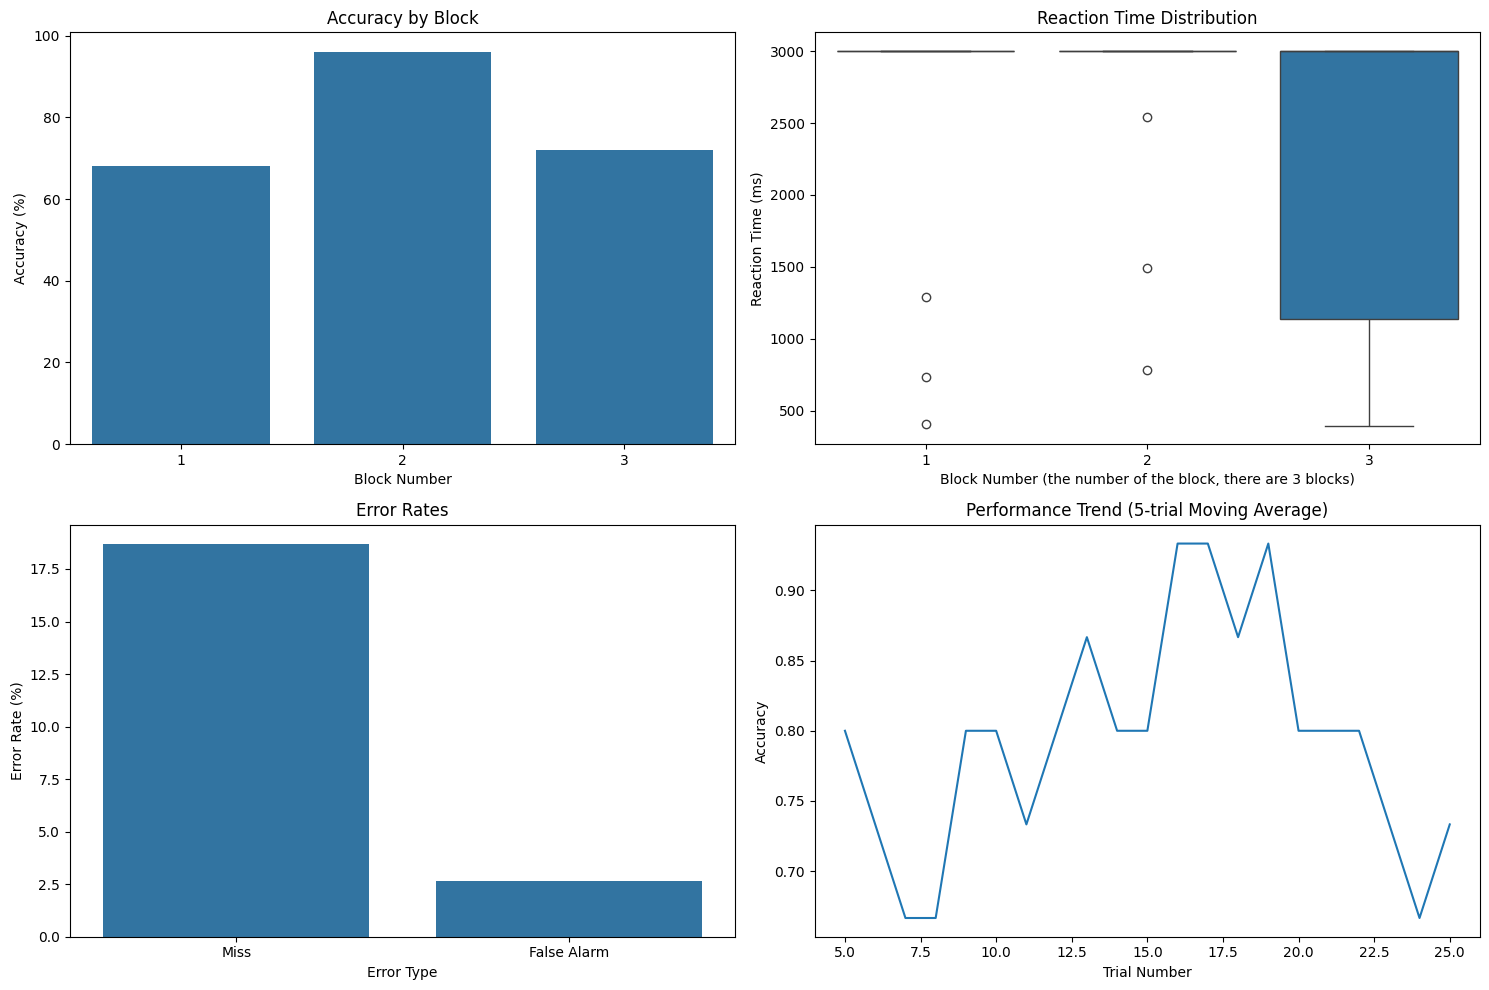

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
n_back_one = pd.read_csv('csv_experiment_data/n_back_1.csv')

# 1. Performance Metrics
def calculate_performance_metrics(df):
    # Overall accuracy
    total_accuracy = df['Score (1 = correct, 0 = incorrect)'].mean() * 100
    
    # Accuracy by block
    block_accuracy = df.groupby('Block Number (the number of the block, there are 3 blocks)')['Score (1 = correct, 0 = incorrect)'].mean() * 100
    
    # Reaction times
    mean_rt = df['Reaction Time'].mean()
    mean_rt_by_block = df.groupby('Block Number (the number of the block, there are 3 blocks)')['Reaction Time'].mean()
    
    # Error types
    miss_rate = df['Miss (1 = participant missed, 0 = participant did not miss; only meaningful on non-match trials)'].mean() * 100
    false_alarm_rate = df['False Alarm (1 = participant wrongly pressed button, 0 = participant correctly pressed button; only meaningful on non-match trials)'].mean() * 100
    
    print("Performance Metrics:")
    print(f"Overall Accuracy: {total_accuracy:.2f}%")
    print("\nAccuracy by Block:")
    print(block_accuracy)
    print(f"\nMean Reaction Time: {mean_rt:.2f} ms")
    print("\nMean Reaction Time by Block:")
    print(mean_rt_by_block)
    print(f"\nMiss Rate: {miss_rate:.2f}%")
    print(f"False Alarm Rate: {false_alarm_rate:.2f}%")
    
    return total_accuracy, block_accuracy, mean_rt, mean_rt_by_block

# 2. Statistical Tests
def perform_statistical_tests(df):
    # Repeated measures ANOVA for block performance
    block_performances = [
        df[df['Block Number (the number of the block, there are 3 blocks)'] == block]['Score (1 = correct, 0 = incorrect)'] 
        for block in df['Block Number (the number of the block, there are 3 blocks)'].unique()
    ]
    f_statistic, p_value = stats.f_oneway(*block_performances)
    
    print("\nStatistical Tests:")
    print(f"One-way ANOVA for Block Performance:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    return f_statistic, p_value

# 3. Visualization Functions
def create_visualizations(df):
    plt.figure(figsize=(15,10))
    
    # 1. Accuracy by Block
    plt.subplot(2, 2, 1)
    block_accuracy = df.groupby('Block Number (the number of the block, there are 3 blocks)')['Score (1 = correct, 0 = incorrect)'].mean() * 100
    sns.barplot(x=block_accuracy.index, y=block_accuracy.values)
    plt.title('Accuracy by Block')
    plt.xlabel('Block Number')
    plt.ylabel('Accuracy (%)')
    
    # 2. Reaction Time Distribution
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Block Number (the number of the block, there are 3 blocks)', y='Reaction Time', data=df)
    plt.title('Reaction Time Distribution')
    plt.ylabel('Reaction Time (ms)')
    
    # 3. Error Analysis
    plt.subplot(2, 2, 3)
    error_data = pd.DataFrame({
        'Error Type': ['Miss', 'False Alarm'],
        'Rate': [
            df['Miss (1 = participant missed, 0 = participant did not miss; only meaningful on non-match trials)'].mean() * 100, 
            df['False Alarm (1 = participant wrongly pressed button, 0 = participant correctly pressed button; only meaningful on non-match trials)'].mean() * 100
        ]
    })
    sns.barplot(x='Error Type', y='Rate', data=error_data)
    plt.title('Error Rates')
    plt.ylabel('Error Rate (%)')
    
    # 4. Performance Over Trials
    plt.subplot(2, 2, 4)
    trial_performance = df.groupby('Trial Number (the number of the trial)')['Score (1 = correct, 0 = incorrect)'].mean().rolling(window=5).mean()
    plt.plot(trial_performance.index, trial_performance.values)
    plt.title('Performance Trend (5-trial Moving Average)')
    plt.xlabel('Trial Number')
    plt.ylabel('Accuracy')
    
    plt.tight_layout()
    plt.show()

# Run the analysis
print("N-Back Test Data Analysis\n")
performance_metrics = calculate_performance_metrics(n_back_one)
statistical_tests = perform_statistical_tests(n_back_one)
create_visualizations(n_back_one)

In [38]:
# Calculate Average Response Time
response_time_avg = stroop_one["Response Time (ms)"].mean()

# Hit rate calculation
correct_responses = stroop_one[stroop_one["Status (1 = correct, 2 = wrong, 3 = timeout)"] == 1]
total_target_stimuli = len(stroop_one)
hit_rate = len(correct_responses) / total_target_stimuli

# False alarm calculation
wrong_responses = stroop_one[stroop_one["Status (1 = correct, 2 = wrong, 3 = timeout)"] == 2]
false_alarm_rate = len(wrong_responses) / total_target_stimuli

# Stroop effect calculation: Average response time (incompatible - compatible)
compatible_responses = stroop_one[stroop_one["Stroop Color Match (1 = compatible, 0 = incompatible)"] == 1]
incompatible_responses = stroop_one[stroop_one["Stroop Color Match (1 = compatible, 0 = incompatible)"] == 0]

compatible_avg_time = compatible_responses["Response Time (ms)"].mean()
incompatible_avg_time = incompatible_responses["Response Time (ms)"].mean()
stroop_effect = incompatible_avg_time - compatible_avg_time

# Output the results
print("Response Time Average: ", response_time_avg)
print("Hit Rate: ", hit_rate)
print("False Alarm Rate: ", false_alarm_rate)
print("Stroop Effect: ", stroop_effect)


Response Time Average:  200.9
Hit Rate:  0.25
False Alarm Rate:  0.75
Stroop Effect:  104.8


In [39]:
# Average response time when Stroop Color Match was compatible vs incompatible
avg_time_compatible = compatible_responses["Response Time (ms)"].mean()
avg_time_incompatible = incompatible_responses["Response Time (ms)"].mean()

# Average response time when the response was correct vs incorrect
correct_avg_time = correct_responses["Response Time (ms)"].mean()
incorrect_avg_time = wrong_responses["Response Time (ms)"].mean()

avg_time_compatible, avg_time_incompatible, correct_avg_time, incorrect_avg_time

(122.3, 227.1, 148.9, 218.23333333333332)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf600e86-d997-4f8a-992e-61a18f163a75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>